In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageChops
from PIL import ImageStat as stat

#a

im = Image.open('im.jpg')

T = np.array(im)

t_r = T[:, :, 0]
t_g = T[:, :, 1]
t_b = T[:, :, 2]

im_r = Image.fromarray(t_r)
im_g = Image.fromarray(t_g)
im_b = Image.fromarray(t_b)

In [39]:
r, g, b = im.split()
print("tryb kanału r: ", r.mode)
print("tryb kanału g: ", g.mode)
print("tryb kanału b: ", b.mode)

tryb kanału r:  L
tryb kanału g:  L
tryb kanału b:  L


In [40]:
im2 = Image.merge('RGB', (b, g, r))
im2.save('im2.jpg')
im2.save('im2.png')

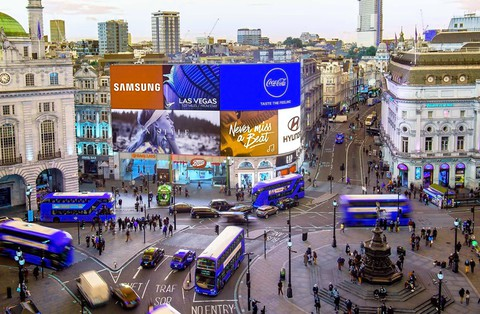

In [41]:
im2

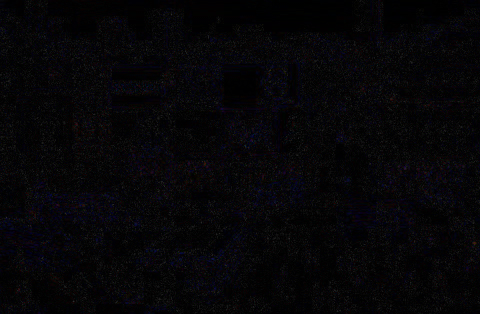

In [42]:
im2_png = Image.open('im2.png')
im2_jpg = Image.open('im2.jpg')

ImageChops.difference(im2_jpg,im2_png)


nie otrzymaliśmy identycznych obrazów ponieważ jeden obraz używa kompresji stratnej a drugi bezstratnej co powoduje że na jednym mamy dobrą jakość a na drugim mogą sie tzw. artefakty czyli jakieś zniekształcenia/szmery lub po prostu obraz będzie w gorszej jakości po kompresji stratnej

In [43]:
def statystyki(im):
    s = stat.Stat(im)
    print("extrema ", s.extrema)
    print("count ", s.count)
    print("median ", s.median)
    print("stddev ", s.stddev)


In [44]:
statystyki(ImageChops.difference(im2_jpg,im2_png))

extrema  [(0, 73), (0, 48), (0, 81)]
count  [150720, 150720, 150720]
median  [4, 4, 5]
stddev  [5.519571204304643, 4.925233725125868, 6.974320225700306]


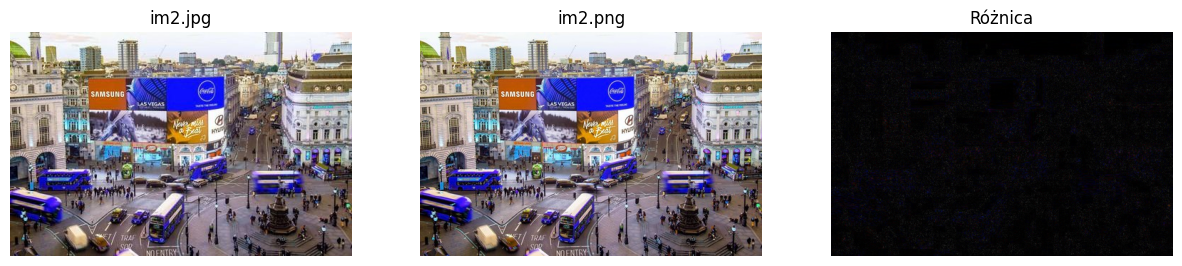

In [45]:
difference = ImageChops.difference(im2_jpg, im2_png)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(im2_jpg)
axes[0].set_title("im2.jpg")
axes[0].axis("off")

axes[1].imshow(im2_png)
axes[1].set_title("im2.png")
axes[1].axis("off")

axes[2].imshow(difference)
axes[2].set_title("Różnica")
axes[2].axis("off")

plt.savefig("fig2.png")
plt.show()

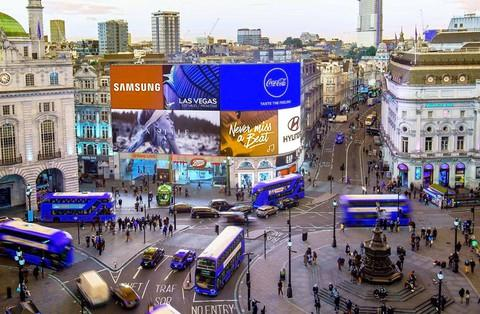

In [46]:
im2_jpg

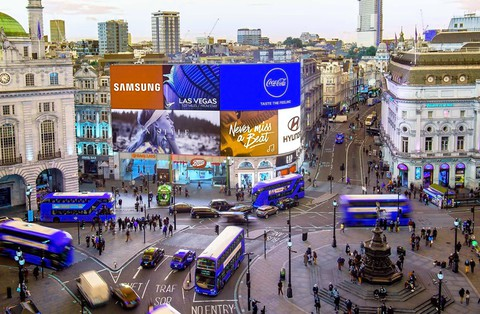

In [47]:
im2_png